In [125]:
# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [126]:
# import the datasets
mat_df = pd.read_csv('student-mat.csv', sep=';')
por_df = pd.read_csv('student-por.csv', sep=';')
df = pd.concat([mat_df, por_df])
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Question 1

Checking size of dataset

In [127]:
df.size

34452

Checking shape / number of data

In [128]:
df.shape

(1044, 33)

Variable types description

In [129]:
df.dtypes.value_counts()

object    17
int64     16
dtype: int64

Checking for missing data

In [64]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [65]:
# check duplicates
df.duplicated().sum()

0

Descriptive statistical analysis

In [66]:
df.describe(include="all").round(1).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,1044,2,GP,772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,1044,2,F,591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1044.0,NaN,NaN,NaN,16.7,1.2,15.0,16.0,17.0,18.0,22.0
address,1044,2,U,759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famsize,1044,2,GT3,738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pstatus,1044,2,T,923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,1044.0,NaN,NaN,NaN,2.6,1.1,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,NaN,NaN,NaN,2.4,1.1,0.0,1.0,2.0,3.0,4.0
Mjob,1044,5,other,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fjob,1044,5,other,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# we seperate out our categorical and continuous column names in lists
cate_columns = df.nunique()[df.nunique() < 10].index
conti_columns = df.nunique()[df.nunique() >= 10].index

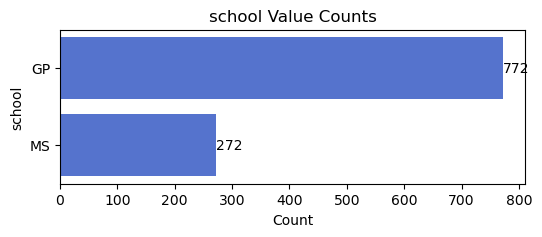

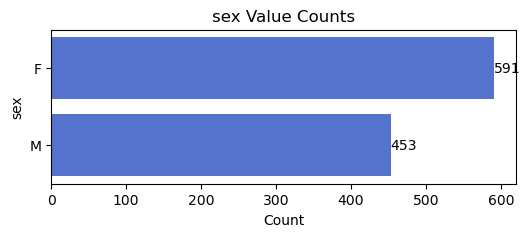

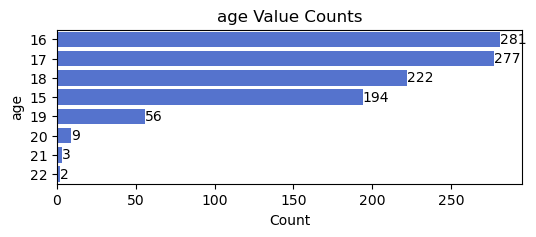

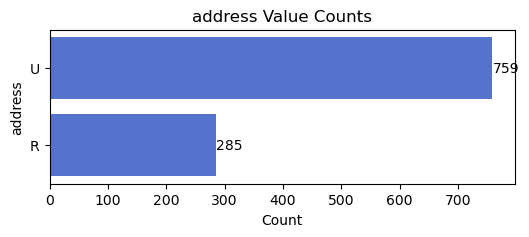

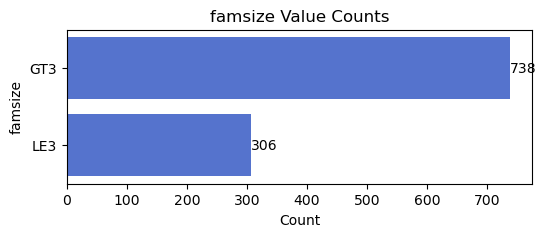

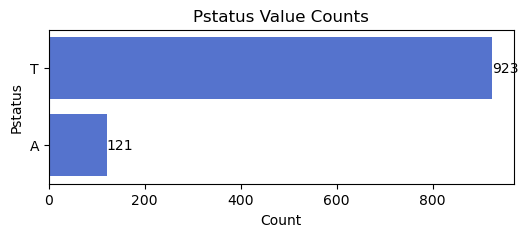

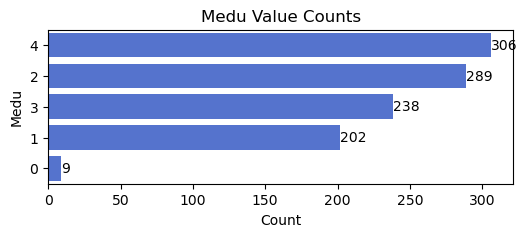

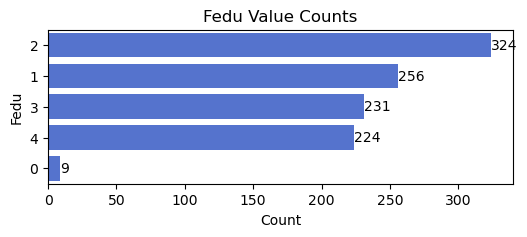

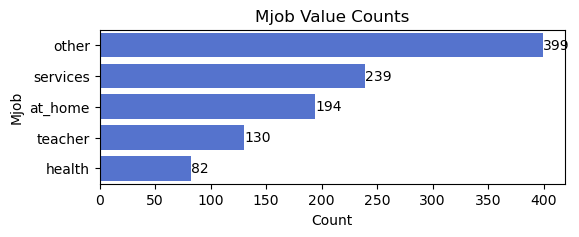

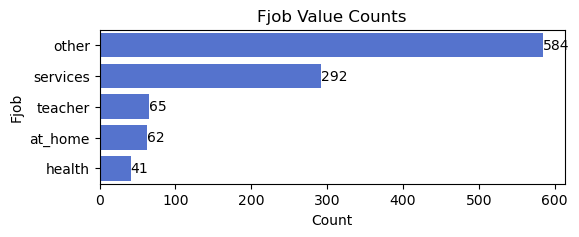

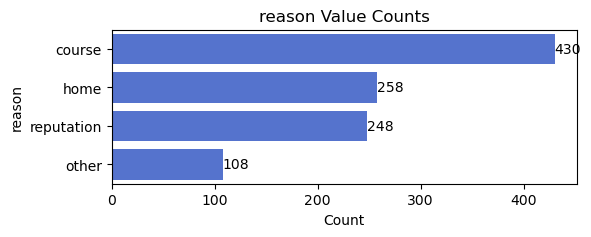

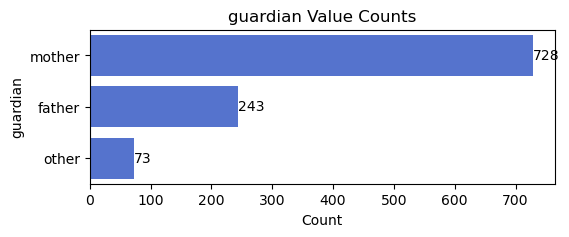

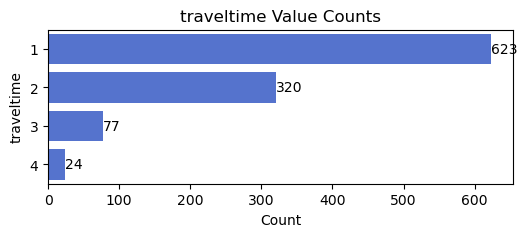

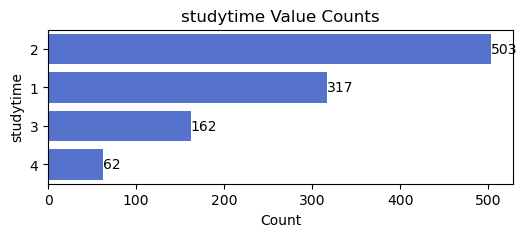

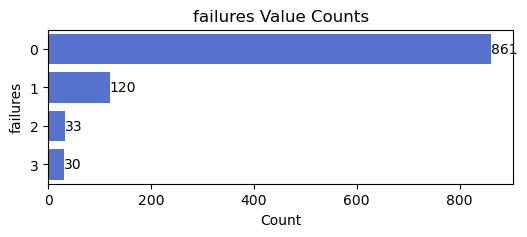

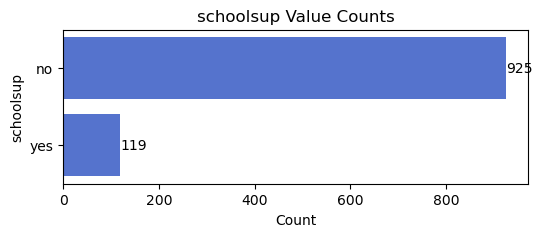

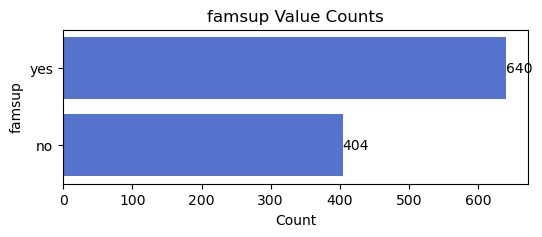

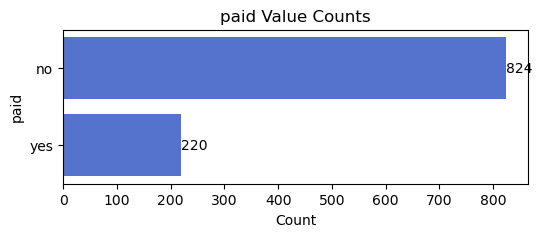

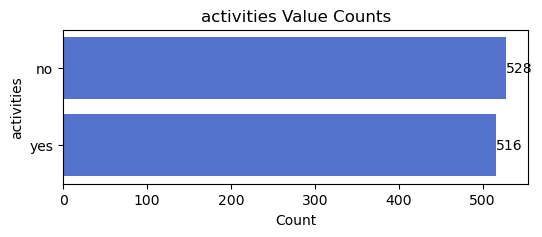

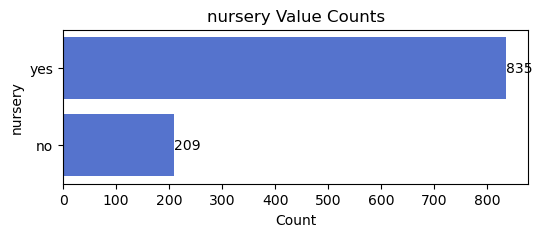

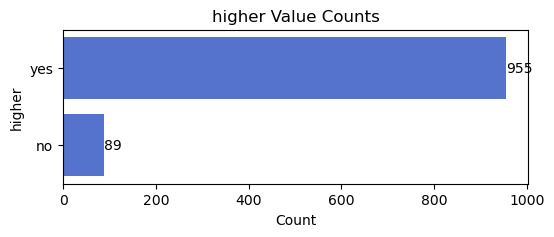

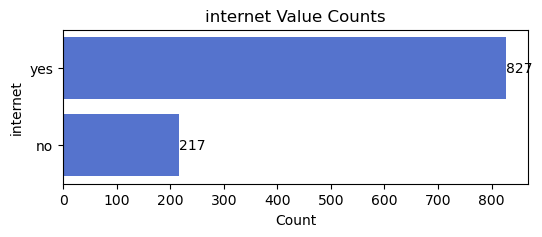

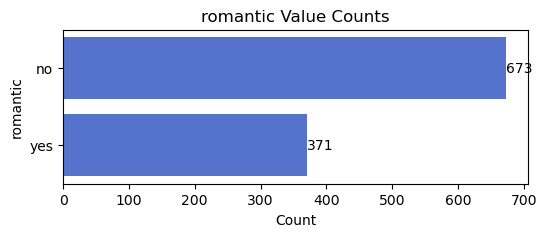

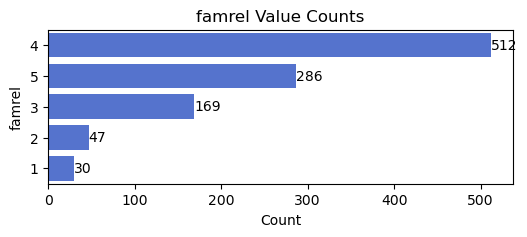

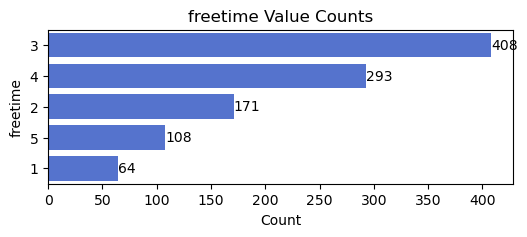

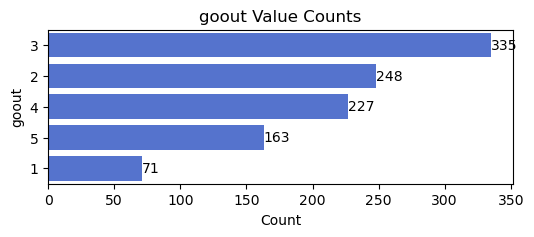

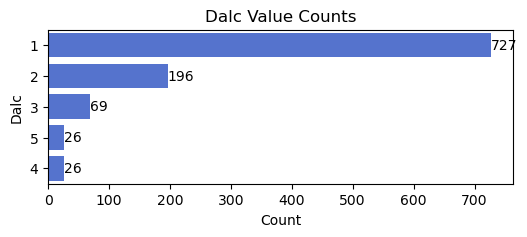

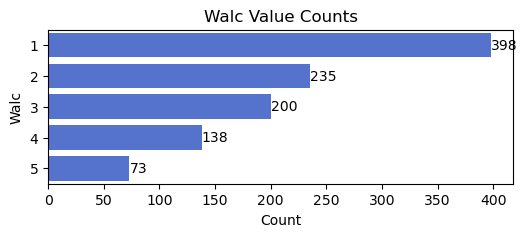

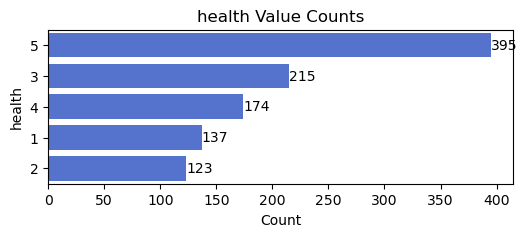

In [68]:
# Bar Plots of all our categorical columns

for col_name in cate_columns:
    x = df[col_name].value_counts()
    y = [str(i) for i in df[col_name].value_counts().index]
    abs_values = df[col_name].value_counts().values

    plt.figure(figsize=(6,2))
    ax = sns.barplot(x = x, y = y, color='royalblue')
    ax.bar_label(container=ax.containers[0], labels=abs_values)
    plt.title(f"{col_name} Value Counts")
    plt.xlabel("Count")
    plt.ylabel(f"{col_name}")
    plt.show()

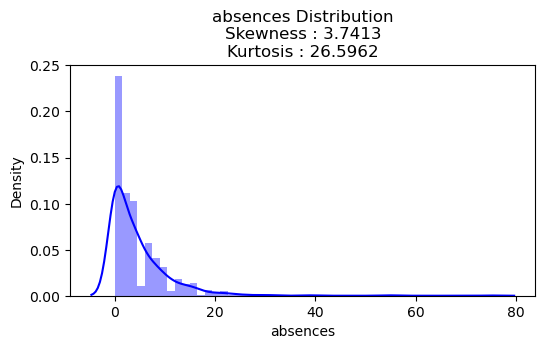

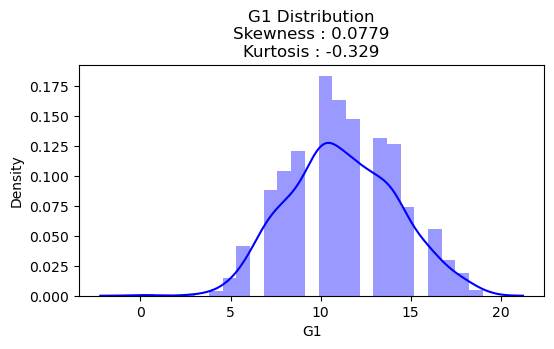

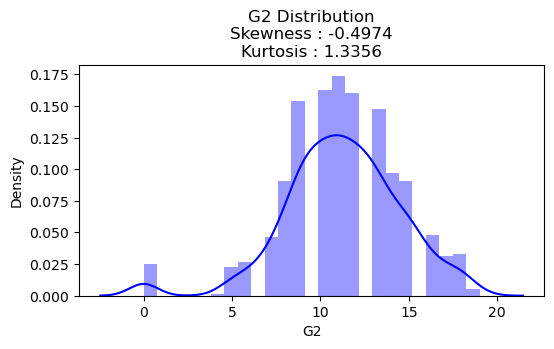

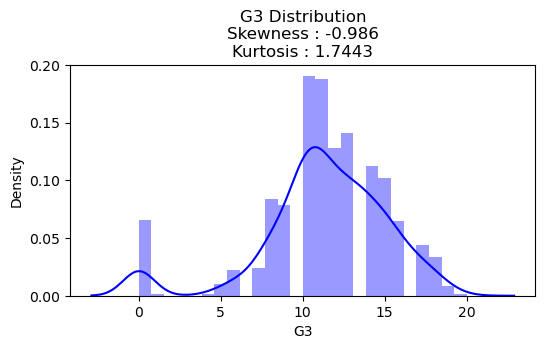

In [69]:
# distribution plots for all our numerical columns
for col_name in conti_columns:
    skew = round(df[col_name].skew(), 4)
    kurt = round(df[col_name].kurt(), 4)

    plt.figure(figsize=(6,3))
    sns.distplot(df[col_name], color="b")
    plt.title(f"{col_name} Distribution\nSkewness : {skew}\nKurtosis : {kurt}")
    plt.show()

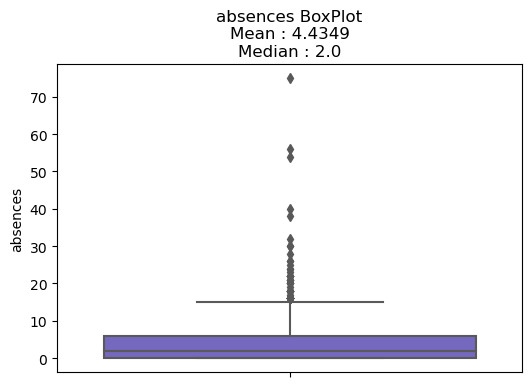

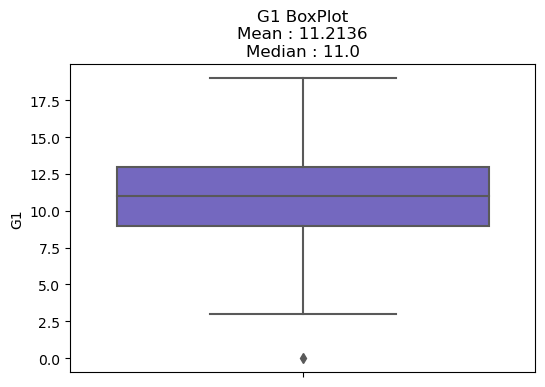

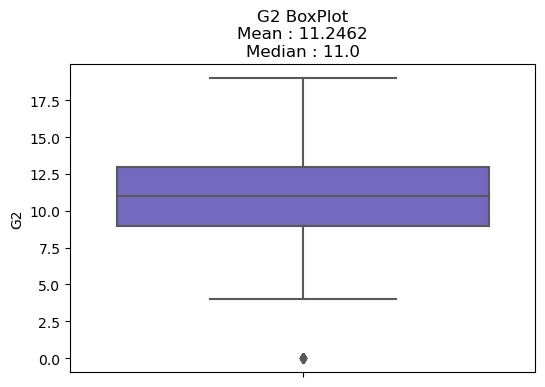

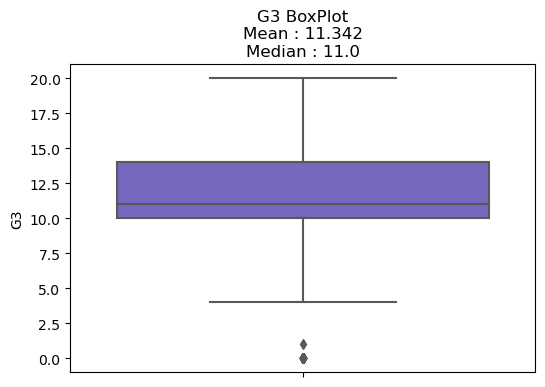

In [70]:
# box plots for all our numerical columns
for col_name in conti_columns:
    mean = round(df[col_name].mean(), 4)
    median = round(df[col_name].median(), 4)

    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col_name], color="slateblue")
    plt.title(f"{col_name} BoxPlot\nMean : {mean}\nMedian : {median}")
    plt.show()

### Advanced Question 1

Factor analysis

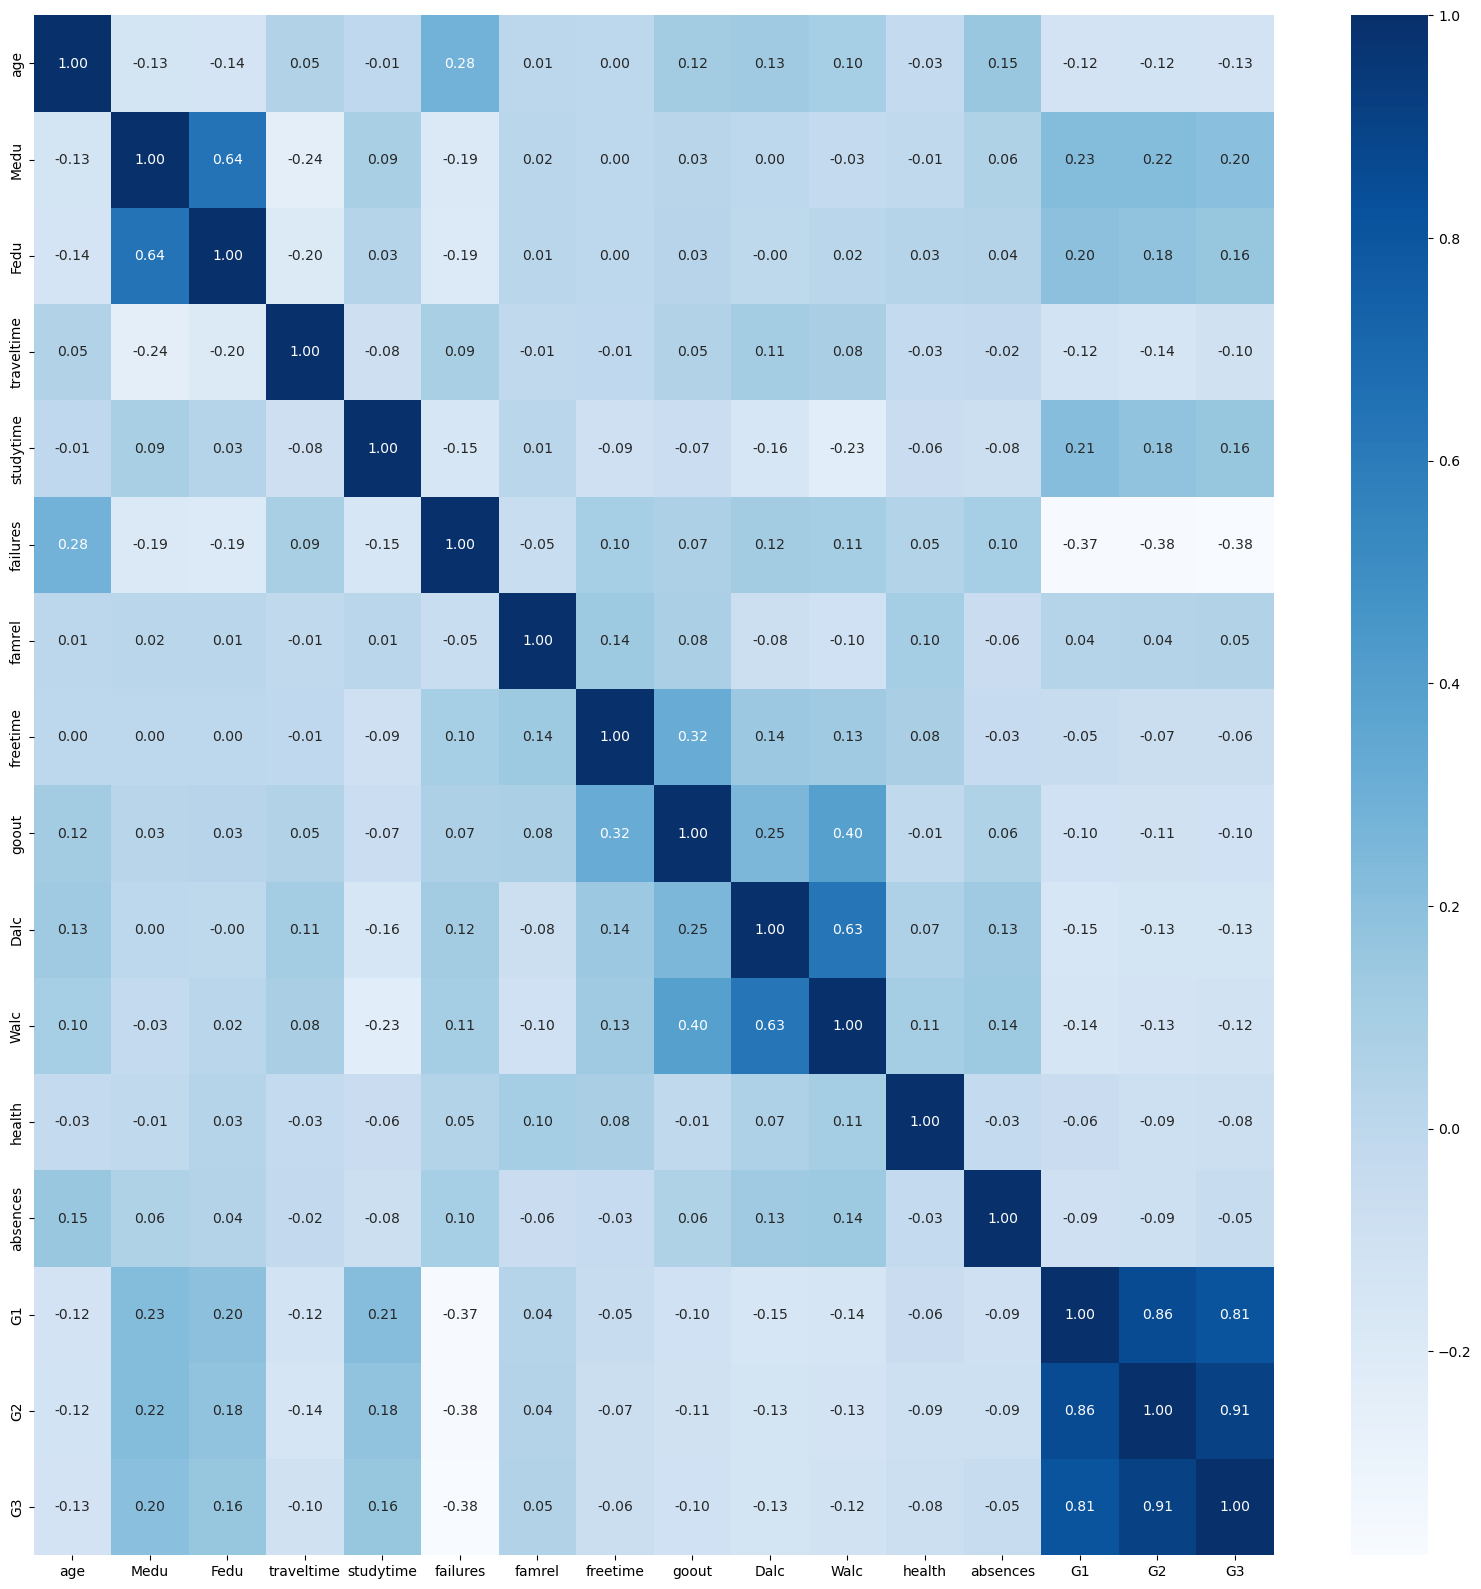

In [90]:
# correlation between all features with our target variable
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt=".02f", cmap='Blues')
plt.show()

### Question 2

In [95]:
# label encode categorical column values
label_en = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_en.fit_transform(df[col])

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


Train Test split

In [96]:
X = df.drop("G3", axis=1)
y = df["G3"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

Random Forest Regression Implementation

In [97]:
rfr_model = RandomForestRegressor(random_state=0)
rfr_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

Importance Graph

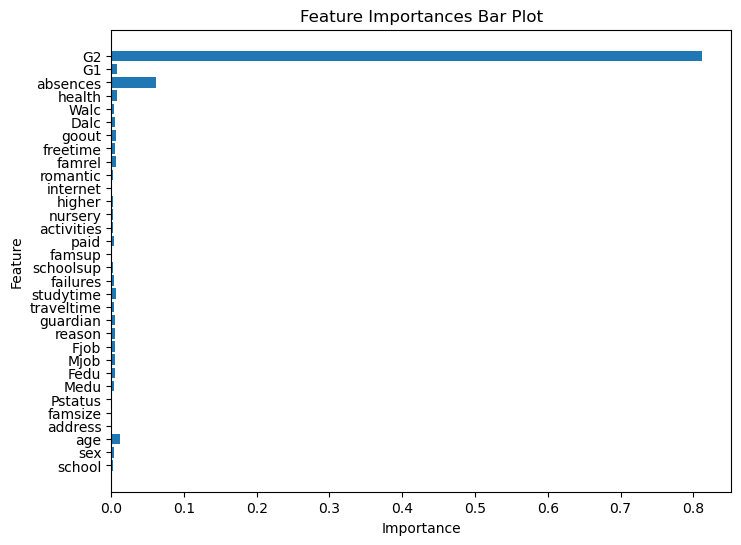

In [101]:
feature_imp_dict = dict(zip(X.columns, rfr_model.feature_importances_))
plt.figure(figsize=(8,6))
plt.barh(width=list(feature_imp_dict.values()), y=list(feature_imp_dict.keys()))
plt.title("Feature Importances Bar Plot")
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

Test dataset evaluation (Accuracy)

In [102]:
rfr_model.score(X_test, y_test)

0.9105924030336843

### Advanced Question 2

Dividing final grade into 3 groups.

In [106]:
# custom function to create tiers

def create_tiers(x):
    if x <= df["G3"].quantile(0.33):
        return 0
    elif x <= df["G3"].quantile(0.66):
        return 1
    elif x > df["G3"].quantile(0.66):
        return 2

In [108]:
# create the tiers
df["grade_tiers"] = df["G3"].apply(create_tiers)

In [109]:
# train test split
X = df.drop(["G3", "grade_tiers"], axis=1)
y = df["grade_tiers"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

Random Forest Classifier Implementation

In [110]:
rfc_model = RandomForestClassifier(random_state=0)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Evaluation using test dataset

In [111]:
print(classification_report(y_test, rfc_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88        41
           1       0.87      0.76      0.81        45
           2       0.89      0.84      0.86        19

    accuracy                           0.85       105
   macro avg       0.86      0.85      0.85       105
weighted avg       0.85      0.85      0.85       105



Confusion Matrix

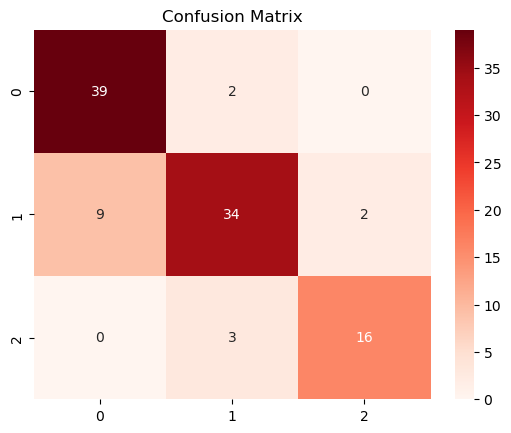

In [131]:
sns.heatmap(confusion_matrix(y_test, rfc_model.predict(X_test)), annot=True, fmt=".0f", cmap='Reds')
plt.title("Confusion Matrix")
plt.show()